<a href="https://colab.research.google.com/github/yousefmasry4/Natural-Language-Processing/blob/master/big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data

**First** download kaggel api to the system

In [10]:
!pip install kaggle

⚠️**Warning** you need to upload kaggel api file to content directory

In [11]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [12]:
!cp kaggle.json ~/.kaggle/

In [13]:
! chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 93% 24.0M/25.7M [00:00<00:00, 20.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 37.6MB/s]


## unzip data 

In [15]:
!unzip /content/imdb-dataset-of-50k-movie-reviews.zip -d /content/data

Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: /content/data/IMDB Dataset.csv  


# Import necessary libraries

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict
from imblearn.over_sampling import ADASYN,SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.preprocessing import RobustScaler
import xgboost
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.metrics import classification_report,confusion_matrix
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import operator
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense

# Data Cleaning

**Load the Dataset**

In [18]:
imdb_data=pd.read_csv('/content/data/IMDB Dataset.csv')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Summary of the dataset**

In [19]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


split data in two parts, a training and test set, **70%** training and **30%** test.

In [23]:
sentences=imdb_data['review']
le=LabelEncoder()
imdb_data['sentiment']= le.fit_transform(imdb_data['sentiment'])

In [24]:
labels=to_categorical(imdb_data['sentiment'],num_classes=2)
X_train,X_test,Y_train,Y_test = train_test_split(imdb_data['review'],labels,test_size=0.3,random_state=10)

In [26]:
Y_test

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## Statistical Analysis
This is the beginning of the analysis step, in which we will first look at the quantity of data included in either sentiment. Following this, we will give some graphical representations of the terms as well as frequency maps.

**Count of good and bad reviews**
*Creating a function to plot the counts using matplotlib*

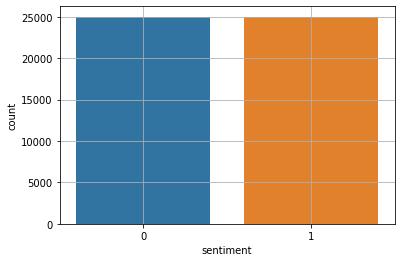

In [27]:
sns.countplot(x=imdb_data['sentiment'])
plt.grid()

**Analyse the count of words in each segment- both positive and negative reviews**
***Function for checking word length***

In [28]:
sentences=imdb_data['review']
le=LabelEncoder()
imdb_data['sentiment']= le.fit_transform(imdb_data['sentiment'])

(-0.5, 799.5, 799.5, -0.5)

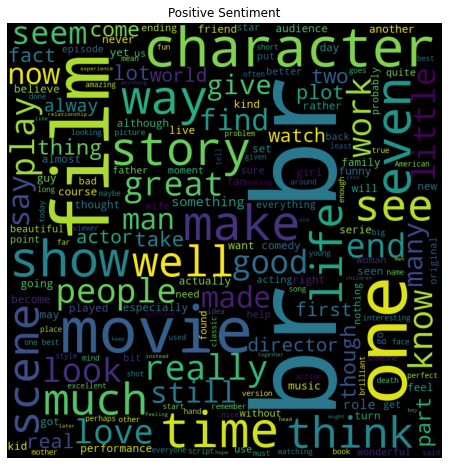

In [29]:
stopwords = set(STOPWORDS) 

pos=' '.join(map(str,sentences[imdb_data['sentiment']==1]))
neg=' '.join(map(str,sentences[imdb_data['sentiment']==0]))
  
wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.title('Positive Sentiment')
plt.axis('off')

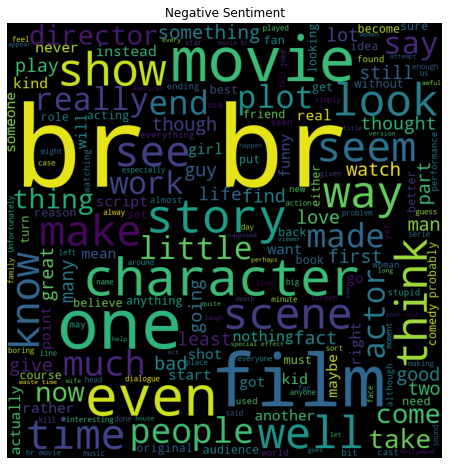

In [30]:
plt.figure(figsize=(8,8))
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(neg) 

plt.imshow(wordcloud2)
plt.title('Negative Sentiment')
plt.axis('off')

plt.show() 

The following can be inferred from the data:



1.   The dataset is balanced.
2.   The dataset contains equal number of semantics for reviews of both polarity.
3.  The dataset contains redundant words and html syntaxes.
Punctuations/stopwords are present in a equal distribution in the dataset.




**So that we have to do lots of cleaning!**

## Cleaning

In [31]:
X_train[:10]

17613    TIllman Jr.'s drama about the first African Am...
29059    LIGHTS OF NEW YORK was the first "all-taking" ...
22180    I am a fairly big fan of most of the films tha...
7529     Wow. This movie bored the pants off me when I ...
41493    I was a huge fan of the original cartoon serie...
46235    This is a typical "perfect crime" thriller. A ...
26609    This film's trailer interested me enough to wa...
4375     Before I comment about this movie, you should ...
42517    This movie re-wrote film history in every way....
35023    While Urban Cowboy did not ooze with the same ...
Name: review, dtype: object

In [32]:
%%time
import re
#Removes Punctuations
def remove_punctuations(data):
    punct_tag=re.compile(r'[^\w\s]')
    data=punct_tag.sub(r'',data)
    return data

#Removes HTML syntaxes
def remove_html(data):
    html_tag=re.compile(r'<.*?>')
    data=html_tag.sub(r'',data)
    return data

#Removes URL data
def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

#Removes Emojis
def remove_emoji(data):
    emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    data=emoji_clean.sub(r'',data)
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data

X_train=X_train.apply(lambda z: remove_punctuations(z))

X_train=X_train.apply(lambda z: remove_html(z))
X_train=X_train.apply(lambda z: remove_url(z))
X_train=X_train.apply(lambda z: remove_emoji(z))

X_test=X_test.apply(lambda z: remove_punctuations(z))

X_test=X_test.apply(lambda z: remove_html(z))
X_test=X_test.apply(lambda z: remove_url(z))
X_test=X_test.apply(lambda z: remove_emoji(z))

CPU times: user 4.81 s, sys: 29.7 ms, total: 4.84 s
Wall time: 4.85 s


In [33]:
X_train[:10]

17613    TIllman Jrs drama about the first African Amer...
29059    LIGHTS OF NEW YORK was the first alltaking fea...
22180    I am a fairly big fan of most of the films tha...
7529     Wow This movie bored the pants off me when I s...
41493    I was a huge fan of the original cartoon serie...
46235    This is a typical perfect crime thriller A per...
26609    This films trailer interested me enough to war...
4375     Before I comment about this movie you should r...
42517    This movie rewrote film history in every way N...
35023    While Urban Cowboy did not ooze with the same ...
Name: review, dtype: object

**In this case, we will be replacing some abbreviated pronouns with full forms (example:"you've"->you have")**

In [34]:
def remove_abb(data):
    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data= re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)  
    data = re.sub(r"donå«t", "do not", data)
    return data
X_train=X_train.apply(lambda z: remove_abb(z))
X_test=X_test.apply(lambda z: remove_abb(z))


In [35]:
X_train[:10]

17613    TIllman Jrs drama about the first African Amer...
29059    LIGHTS OF NEW YORK was the first alltaking fea...
22180    I am a fairly big fan of most of the films tha...
7529     Wow This movie bored the pants off me when I s...
41493    I was a huge fan of the original cartoon serie...
46235    This is a typical perfect crime thriller A per...
26609    This films trailer interested me enough to war...
4375     Before I comment about this movie you should r...
42517    This movie rewrote film history in every way N...
35023    While Urban Cowboy did not ooze with the same ...
Name: review, dtype: object

In [36]:
def embedding_coverage(review,embeddings):
    
    vocab=vocab_build(review)
    
    covered={}
    word_count={}
    oov={}
    covered_num=0
    oov_num=0
    
    for word in vocab:
        try:
            covered[word]=embeddings[word]
            covered_num+=vocab[word]
            word_count[word]=vocab[word]
        except:
            oov[word]=vocab[word]
            oov_num+=oov[word]
    
    vocab_coverage=len(covered)/len(vocab)*100
    text_coverage = covered_num/(covered_num+oov_num)*100
    
    sorted_oov=sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    sorted_word_count=sorted(word_count.items(), key=operator.itemgetter(1))[::-1]
    
    return sorted_word_count,sorted_oov,vocab_coverage,text_coverage
        

# embedding

## Download glove

In [37]:
!kaggle datasets download authman/pickled-glove840b300d-for-10sec-loading

100% 2.33G/2.33G [00:55<00:00, 48.6MB/s]
100% 2.33G/2.33G [00:55<00:00, 45.2MB/s]


In [38]:
!unzip /content/pickled-glove840b300d-for-10sec-loading.zip -d /content/data

Archive:  /content/pickled-glove840b300d-for-10sec-loading.zip
  inflating: /content/data/glove.840B.300d.pkl  


In [39]:
glove_embeddings= np.load('/content/data/glove.840B.300d.pkl',
                          allow_pickle=True)

In [40]:
def vocab_build(review):
    
    comments = review.apply(lambda s: s.split()).values
    vocab={}
    
    for comment in comments:
        for word in comment:
            try:
                vocab[word]+=1
                
            except KeyError:
                vocab[word]=1
    return vocab

In [41]:
train_covered,train_oov,train_vocab_coverage,train_text_coverage=embedding_coverage(X_train,glove_embeddings)
test_covered,test_oov, test_vocab_coverage, test_text_coverage = embedding_coverage(X_test,glove_embeddings)

print(f"Glove embeddings cover {round(train_vocab_coverage,2)}% of vocabulary and {round(train_text_coverage,2)}% text in training set")
print(f"Glove embeddings cover {round(test_vocab_coverage,2)}% of vocabulary and {round(test_text_coverage,2)}% text in testing set")

Glove embeddings cover 60.51% of vocabulary and 98.3% text in training set
Glove embeddings cover 69.38% of vocabulary and 98.33% text in testing set


In [42]:
X_train=X_train.apply(lambda z: remove_abb(z))
X_train

17613    TIllman Jrs drama about the first African Amer...
29059    LIGHTS OF NEW YORK was the first alltaking fea...
22180    I am a fairly big fan of most of the films tha...
7529     Wow This movie bored the pants off me when I s...
41493    I was a huge fan of the original cartoon serie...
                               ...                        
40059    This film is just a shame Orlando Florida seem...
28017    Having seen Versus previously I had high hopes...
29199    I must admit I burst out laughing when I saw o...
40061    You can find an antiwar statement here without...
17673    Mr Seagal has apparantly lowered his already l...
Name: review, Length: 35000, dtype: object

In [43]:
train_oov[:10]

[('itbr', 1369),
 ('moviebr', 1168),
 ('filmbr', 1077),
 ('timebr', 497),
 ('thembr', 390),
 ('thatbr', 339),
 ('thisbr', 334),
 ('onebr', 318),
 ('himbr', 316),
 ('allbr', 311)]

In [44]:
del glove_embeddings,train_oov,test_oov

# Model Building

In [45]:
num_words=80000
embeddings=256
tokenizer=Tokenizer(num_words=num_words,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
total_vocab=len(word_index)

In [46]:
sequences_train=tokenizer.texts_to_sequences(X_train)
sequences_test=tokenizer.texts_to_sequences(X_test)

In [53]:
max_len=max(max([len(x) for x in sequences_train]),max([len(x) for x in sequences_test]))

X_train=pad_sequences(sequences_train,maxlen=max_len)
X_test=pad_sequences(sequences_test,maxlen=max_len)

##Model 1

In [54]:
model= keras.Sequential()
model.add(Embedding(num_words,embeddings,input_length=max_len))
model.add(Conv1D(256,10,activation='relu'))
model.add(keras.layers.Bidirectional(LSTM(128,return_sequences=True)))
model.add(LSTM(64))
model.add(keras.layers.Dropout(0.4))
model.add(Dense(2,activation='softmax'))

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [56]:
es= EarlyStopping(monitor='val_accuracy',
                  patience=2
                 )

checkpoints=ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                            verbose=0,
                            save_best_only=True
                           )

callbacks=[es,checkpoints]

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,callbacks=callbacks)

Epoch 1/5
 737/1094 [===================>..........] - ETA: 6:08 - loss: 0.4785 - accuracy: 0.7805

In [ ]:
def plot_graph(history,string):
    
    plt.plot(history.history[string],label='training '+string)
    plt.plot(history.history['val_'+string],label='validation '+string)
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.title(string+' vs epochs')
    plt.show()

In [ ]:
plot_graph(history,'accuracy')

In [ ]:
model.save('model1.h5')

## model 2

In [ ]:
model= keras.Sequential()
model.add(Embedding(num_words,embeddings,input_length=max_len))
model.add(LSTM(units=16, return_sequences=True))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.LSTM(units=8, return_sequences=True))
model.add(keras.layers.Dropout(0.1))

model.add(LSTM(units=4))
model.add(keras.layers.Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [ ]:
es= EarlyStopping(monitor='val_accuracy',
                  patience=2
                 )

checkpoints=ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                            verbose=0,
                            save_best_only=True
                           )

callbacks=[es,checkpoints]

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,callbacks=callbacks)

In [ ]:
plot_graph(history,'accuracy')

In [ ]:
model.save('model2.h5')

## Model 3

In [ ]:
model= keras.Sequential()
model.add(Embedding(num_words,embeddings,input_length=max_len))
model.add(LSTM(units=16, return_sequences=True))

model.add(keras.layers.Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1)))
model.add(keras.layers.GlobalMaxPool1D())
model.add(Dense(100, activation="relu"))
model.add( keras.layers.Dropout(0.25))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [ ]:
es= EarlyStopping(monitor='val_accuracy',
                  patience=2
                 )

checkpoints=ModelCheckpoint(filepath='./',
                            monitor="val_accuracy",
                            verbose=0,
                            save_best_only=True
                           )

callbacks=[es,checkpoints]

In [ ]:
history=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,callbacks=callbacks)

In [ ]:
plot_graph(history,'accuracy')

In [ ]:
model.save('model3.h5')